# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [62]:
sinasc_raw = pd.read_csv('data/SINASC/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [63]:
min = sinasc_raw['munResLat'].min(0)

max = sinasc_raw['munResLat'].max(0)

print('min:', min, '\nmax:', max)

print('\n', sinasc_raw.columns)

min: -13.49976 
max: -8.76889

 Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munR

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [64]:
colunas_1 = ['munResLat', 'QTDFILMORT', 'CONSULTAS']

sinasc_1 = sinasc_raw[colunas_1].copy()

#sinasc_1['faixa_lat']
sinasc_1.loc[:, 'faixa_lat'] = pd.cut(sinasc_1['munResLat'],
                                      bins=[-float('inf'),-10.5, float('inf')],
                                      labels=['Abaixo de -10.5', 'Acima de -10.5'])


final = sinasc_1.groupby('faixa_lat', observed=False).agg({
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],  # Operações para a variável 'peso'
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']  # Operações para a variável 'altura'
})

final

QTDFILMORT                                                  \
                       sum      mean  min   max median       std       var   
faixa_lat                                                                    
Abaixo de -10.5     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317   
Acima de -10.5      3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204   

                CONSULTAS                                               
                      sum      mean min max median       std       var  
faixa_lat                                                               
Abaixo de -10.5     48000  3.694297   1   9    4.0  0.643372  0.413928  
Acima de -10.5      48662  3.467436   1   9    4.0  0.888240  0.788970

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [65]:
colunas_2 = ['munResArea', 'APGAR5', 'PESO']
sinasc_2 = sinasc_raw[colunas_2].copy()

sinasc_2['faixa_mun'] = pd.cut(sinasc_2['munResArea'],
                               bins=[-float('inf'), 3000, float('inf')],
                               labels=['Abaixo de 3000', 'Acima de 3000'])

final = sinasc_2.groupby('faixa_mun', observed=False).agg({
    'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],  # Operações para a variável 'peso'
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']  # Operações para a variável 'altura'
})

final

APGAR5                                                  \
                     sum      mean  min   max median       std       var   
faixa_mun                                                                  
Abaixo de 3000   47560.0  9.130351  0.0  10.0    9.0  0.801124  0.641799   
Acima de 3000   199579.0  9.190836  0.0  10.0    9.0  0.787591  0.620299   

                    PESO                                              \
                     sum         mean  min   max  median         std   
faixa_mun                                                              
Abaixo de 3000  16796616  3218.359073  258  5720  3245.0  531.583103   
Acima de 3000   70857126  3249.134538  292  5985  3280.0  547.716582   

                               
                          var  
faixa_mun                      
Abaixo de 3000  282580.595074  
Acima de 3000   299993.453720

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [66]:
min = sinasc_raw['munResAlt'].min(0)

max = sinasc_raw['munResAlt'].max(0)

print('min:', min, '\nmax:', max)

min: 85.0 
max: 595.0


In [67]:
colunas_3 = ['munResAlt', 'IDADEPAI', 'IDADEMAE']
sinasc_3 = sinasc_raw[colunas_3].copy()

sinasc_3['faixa_alt'] = pd.cut(sinasc_3['munResAlt'], bins=[-float('inf'), 300, float('inf')], labels=['<300', '>=300'])

final = sinasc_3.groupby('faixa_alt', observed=False).agg({
    'IDADEPAI': ['mean', 'min', 'max', 'median', 'std', 'var'],  # Operações para a variável 'peso'
    'IDADEMAE': ['mean', 'min', 'max', 'median', 'std', 'var']  # Operações para a variável 'altura'
})

final

IDADEPAI                                           IDADEMAE      \
                mean   min   max median       std        var       mean min   
faixa_alt                                                                     
<300       31.115340  15.0  86.0   30.0  7.811789  61.024041  26.072983  11   
>=300      30.868657  16.0  60.0   30.0  7.336911  53.830257  26.299156  13   

                                           
          max median       std        var  
faixa_alt                                  
<300       53   26.0  6.389851  40.830200  
>=300      53   26.0  6.358600  40.431789

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [68]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

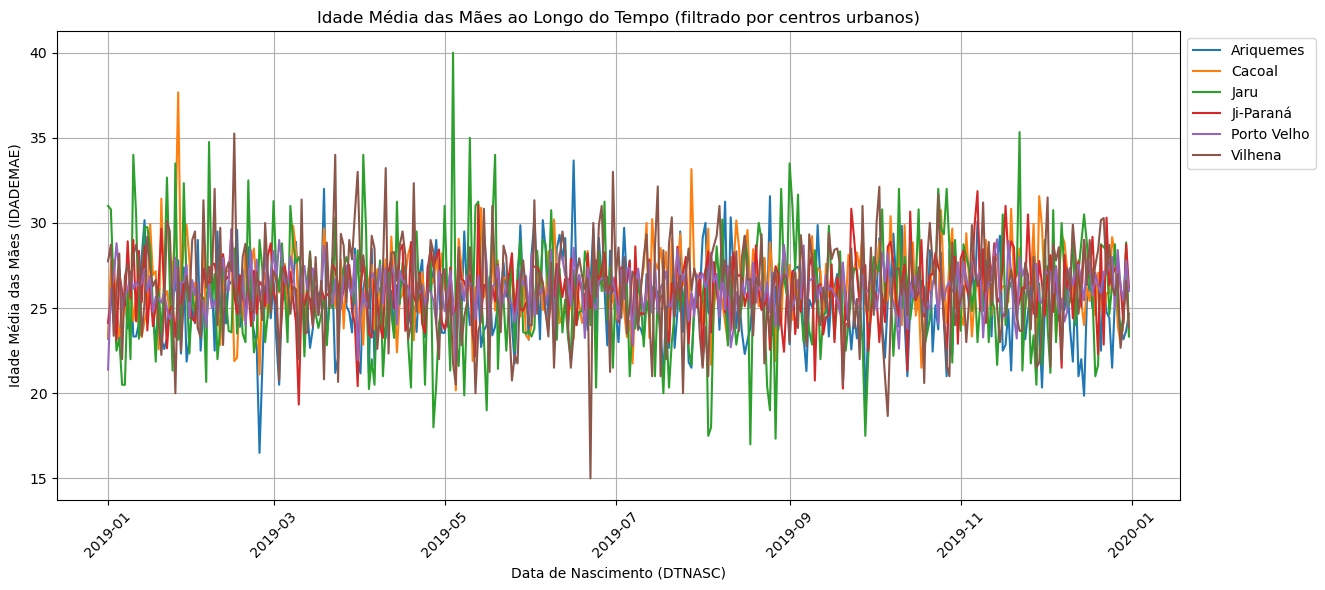

In [69]:
colunas_4 = ['munResNome', 'IDADEMAE', 'DTNASC']

sinasc_4 = sinasc_raw[colunas_4].copy()
sinasc_4['imediata'] = sinasc_4['munResNome'].map(imediatas)

colunas_4 = ['imediata', 'IDADEMAE', 'DTNASC']
sinasc_4 = sinasc_4[colunas_4].copy()

# converter coluna de datas para formato correspondente
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])

sinasc_agrupado = sinasc_4.groupby(['DTNASC', 'imediata'])['IDADEMAE'].mean().reset_index()

plt.figure(figsize=(12, 6))

for imediata in sinasc_agrupado['imediata'].unique():
    dados_filtrados = sinasc_agrupado[sinasc_agrupado['imediata'] == imediata]
    plt.plot(dados_filtrados['DTNASC'], dados_filtrados['IDADEMAE'], label=imediata)

# Customizando o gráfico
plt.title('Idade Média das Mães ao Longo do Tempo (filtrado por centros urbanos)')
plt.xlabel('Data de Nascimento (DTNASC)')
plt.ylabel('Idade Média das Mães (IDADEMAE)')
plt.xticks(rotation=45)  # Rotacionar os rótulos das datas para melhor visualização
plt.legend(title='Centros Urbanos')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [70]:
sinasc_agrupado['imediata'].unique()

array(['Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho',
       'Vilhena'], dtype=object)

Mas esse gráfico está muito bagunçado, certo? No caso desse exercício fizemos uma demonstração das funções groupby() e agg(). Também é possível fazer plotagem de regiões imediatas específicas, assim diminuindo a poluição visual! Veja um exemplo:

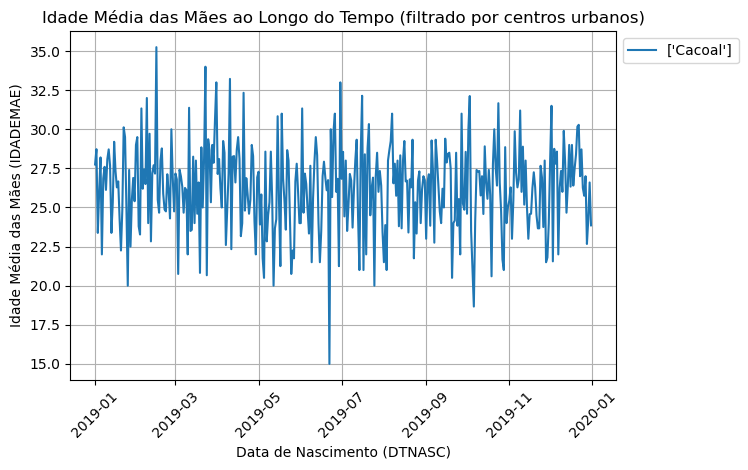

In [71]:
sinasc_agrupado = sinasc_agrupado[sinasc_agrupado['imediata'] == 'Cacoal'].copy()

plt.plot(sinasc_agrupado['DTNASC'], dados_filtrados['IDADEMAE'], label=['Cacoal'])

# Customizando o gráfico
plt.title('Idade Média das Mães ao Longo do Tempo (filtrado por centros urbanos)')
plt.xlabel('Data de Nascimento (DTNASC)')
plt.ylabel('Idade Média das Mães (IDADEMAE)')
plt.xticks(rotation=45)  # Rotacionar os rótulos das datas para melhor visualização
plt.legend(title='Centros Urbanos')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [75]:
idh_HTML = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M')

In [76]:
# foram encontradas 4 tabelas
dataset_IDH = idh_HTML

dataset_IDH = dataset_IDH[0] #selecionar apenas a primeira
dataset_IDH = dataset_IDH.reset_index()

dataset_IDH

index            Posição                  Município      Dados de 2010  \
                    Posição                  Município      IDH municipal   
           IDH-M muito alto           IDH-M muito alto   IDH-M muito alto   
0      0   nenhum município           nenhum município   nenhum município   
1      1         IDH-M alto                 IDH-M alto         IDH-M alto   
2      2                  1                Porto Velho              0.736   
3      3                  2                    Vilhena              0.731   
4      4                  3                     Cacoal              0.718   
5      5                  4                  Ji-Paraná              0.714   
6      6                  5              Pimenta Bueno              0.710   
7      7                  6                  Ariquemes              0.702   
8      8                  7             Rolim de Moura              0.700   
9      9        IDH-M médio                IDH-M médio        IDH-M médio   
10    10                  8                 Cerejeiras              0.692   
11    11                  9                       Jaru              0.689   
12    12                 10          Colorado do Oeste              0.685   
13    13                 11        Ouro Preto do Oeste              0.682   
14    14                 12            Espigão d'Oeste              0.672   
15    15                 13        Santa Luzia d'Oeste              0.670   
16    16                 14       Pimenteiras do Oeste              0.665   
17    17                 15          Presidente Médici              0.664   
18    18                 16               Castanheiras              0.658   
19    19                 17              Guajará-Mirim              0.657   
20    20                 18                Chupinguaia              0.652   
21    21                 19                     Cabixi              0.650   
22    22                 20         Candeias do Jamari              0.649   
23    23                 20         São Felipe d'Oeste              0.649   
24    24                 22                Cacaulândia              0.646   
25    25                 22      São Miguel do Guaporé              0.646   
26    26                 24           Mirante da Serra              0.643   
27    27                 24           Alvorada d'Oeste              0.643   
28    28                 24              Teixeirópolis              0.643   
29    29                 24   Nova Brasilândia d'Oeste              0.643   
30    30                 24                 Rio Crespo              0.643   
31    31                 29      Primavera de Rondônia              0.641   
32    32                 29      Alta Floresta d'Oeste              0.641   
33    33                 31         Ministro Andreazza              0.638   
34    34                 32    Novo Horizonte do Oeste              0.634   
35    35                 33            Vale do Paraíso              0.627   
36    36                 34               Alto Paraíso              0.625   
37    37                 35                    Parecis              0.617   
38    38                 36                    Buritis              0.616   
39    39                 37            Itapuã do Oeste              0.614   
40    40                 38                 Corumbiara              0.613   
41    41                 39                    Cujubim              0.612   
42    42                 40              Costa Marques              0.611   
43    43                 40   São Francisco do Guaporé              0.611   
44    44                 42                      Urupá              0.609   
45    45                 43                Monte Negro              0.607   
46    46        IDH-M baixo                IDH-M baixo        IDH-M baixo   
47    47                 44               Seringueiras              0.598   
48    48                 45  Governador Jorge Teixeira              0.596   

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.